In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

from loaders import Mnist
mnist = Mnist()

In [2]:
state = torch.load('states/aae_mnist_scheduled.tar')
results = state['results']
print(len(results['x_rec']))

5000


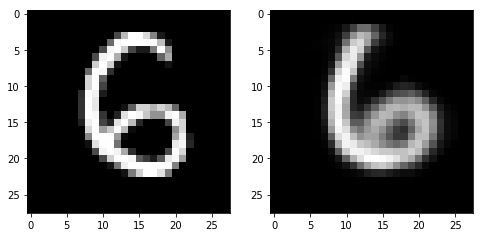

In [3]:
#rec
epoch = -1
n = 4

fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(121)
ax.imshow(mnist.valid.x[n].reshape(28,28), cmap='gray')

ax = fig.add_subplot(122)
ax.imshow(results['x_rec'][epoch][n].reshape(28,28), cmap='gray')

plt.show()

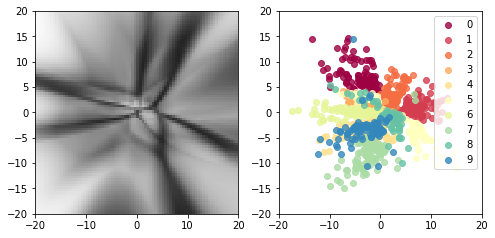

In [42]:
#z space
epoch = -1

fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(121)
ax.imshow(results['z_hmap'][epoch].reshape(80,80), cmap='gray',
          vmin=0, vmax=1, origin='lower', extent=[-20,20,-20,20])

ax = fig.add_subplot(122)
color = mnist.valid.y[:1000]
cmap = matplotlib.cm.get_cmap('Spectral')
for i in range(10):
    X, Y = results['z_space'][epoch].T
    rgba = cmap(i/10)
    ax.scatter(X[color==i], Y[color==i], c=rgba, label=i, alpha=0.8)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.legend()

plt.show()

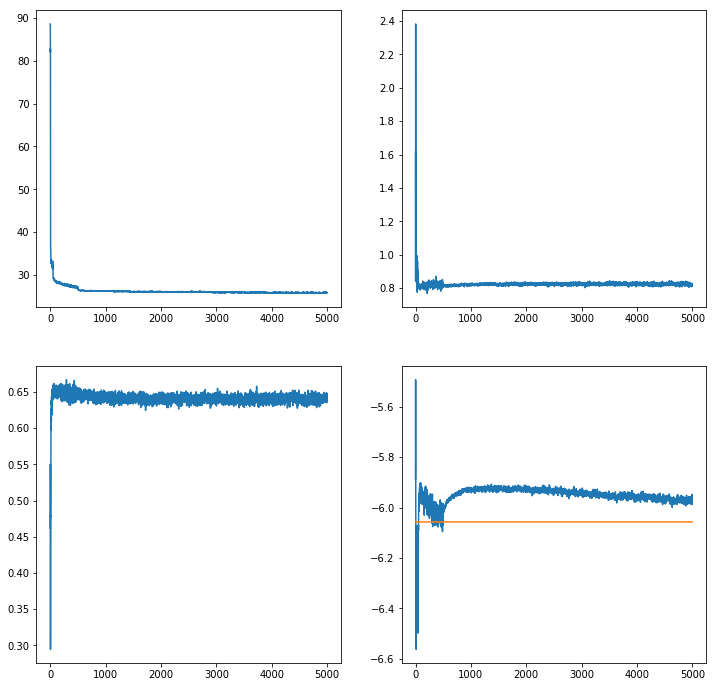

In [43]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(221)
ax.plot(results['rec'])

ax = fig.add_subplot(222)
ax.plot(results['gen'])

ax = fig.add_subplot(223)
ax.plot(results['adv'])

ax = fig.add_subplot(224)
ax.plot(results['llh'])
ax.plot([-6.0567528 for _ in range(len(results['llh']))])